# Symulacje

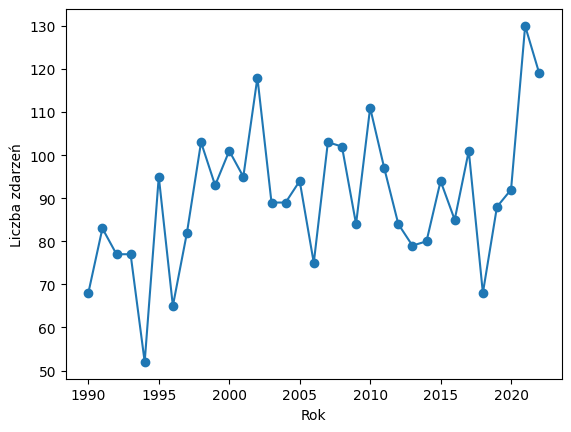

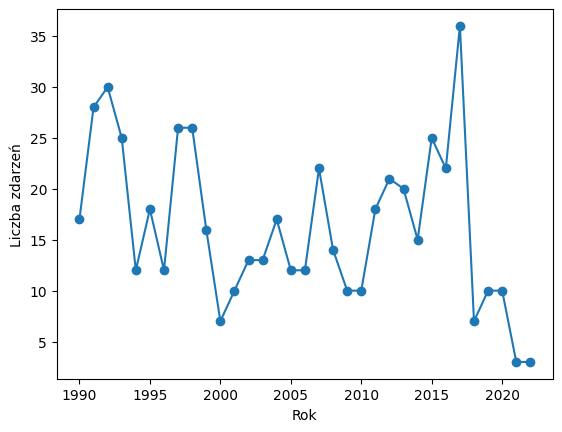

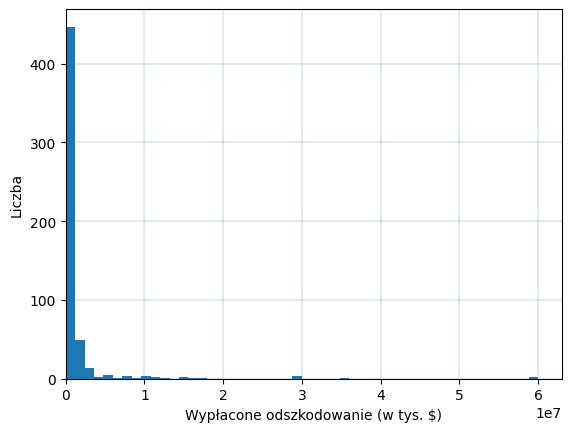

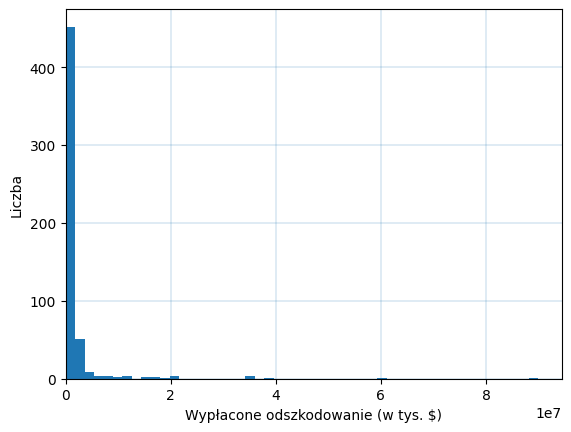

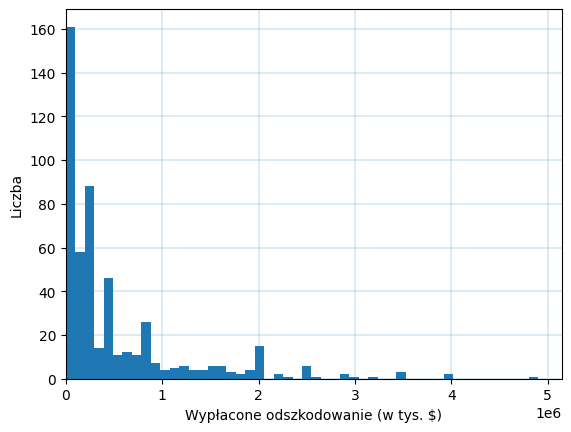

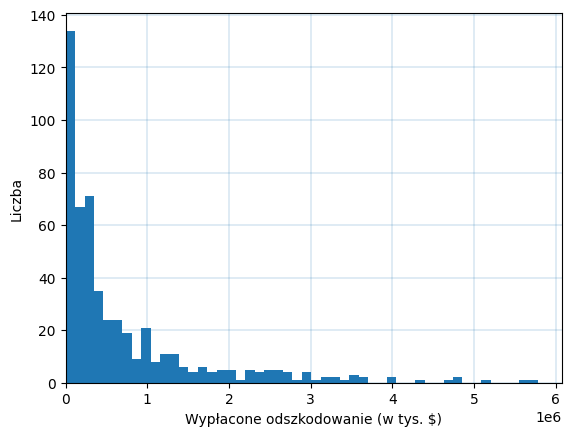

In [11]:
#%run "C:\Users\ndzadz001\Documents\Mgr\Repo\mgr\DataPreparation.ipynb"
#%run "C:\Users\ndzadz001\Documents\Mgr\Repo\mgr\Modelowanie_liczby_roszczen.ipynb"

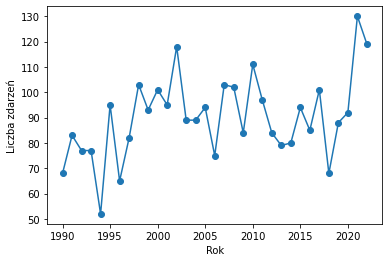

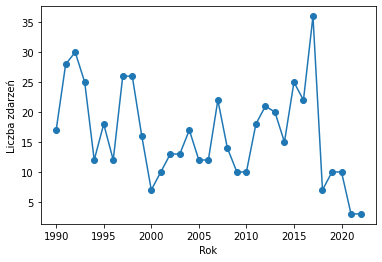

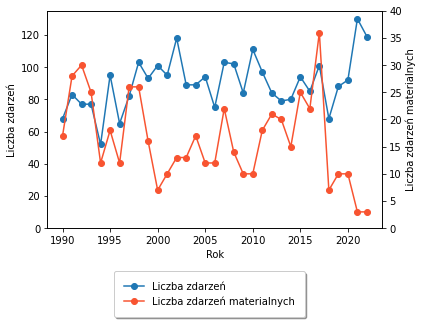

C:\Users\ndzad\AppData\Local\Temp/ipykernel_10756/324694881.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


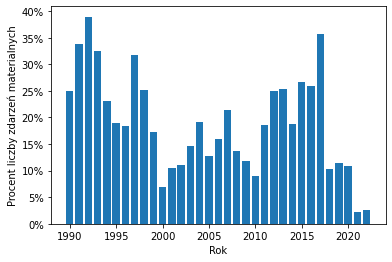

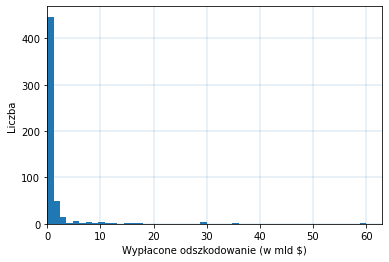

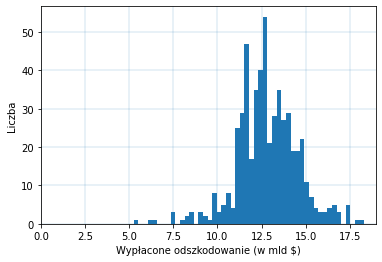

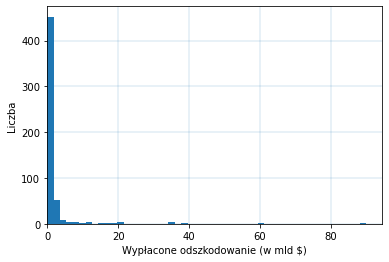

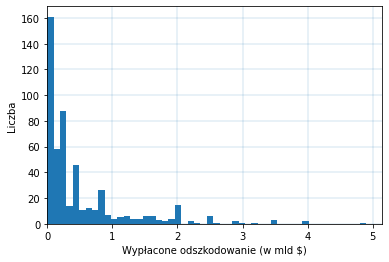

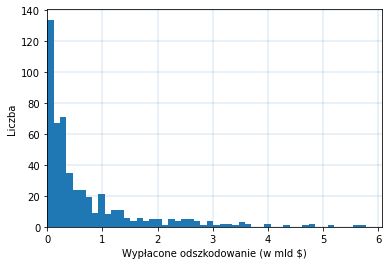

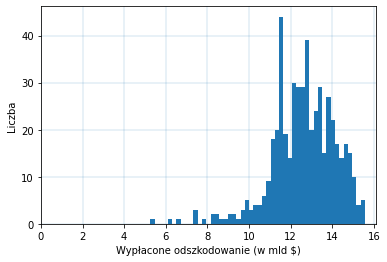

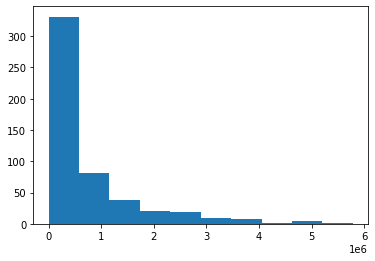

1.395e-06


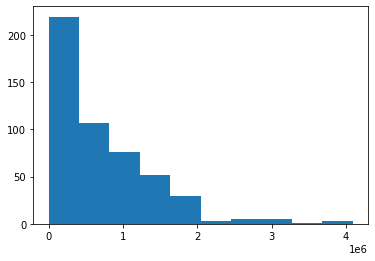

       rozkład test  Wartość statystyki       p value
0  Wykładniczy   KS                0.17  2.204314e-13
1  Wykładniczy   CM                3.84  1.057934e-09
12.62 2.34
12.621668063027759 2.340781724143795


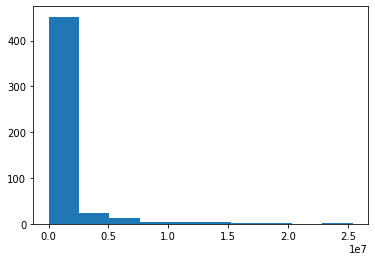

       rozkład test  Wartość statystyki   p value
0  Lognormalny   KS                0.06  0.067392
1  Lognormalny   CM                0.31  0.124573
0.7 9.791403734607547e-07


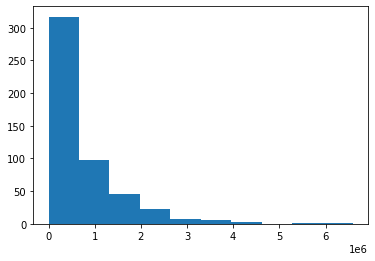

  rozkład test  Wartość statystyki   p value
0   Gamma   KS                0.11  0.000022
1   Gamma   CM                0.92  0.003782
2.0 2.0
0.7815037630821766 616457.6285386455


C:\Users\ndzad\AppData\Local\Temp/ipykernel_10756/1843262892.py:5: RuntimeWarning: divide by zero encountered in log
  eq2 = np.log(np.mean(X)/np.power(np.prod(X),1/n))-np.log(alpha)+psi(alpha)
c:\Users\ndzad\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


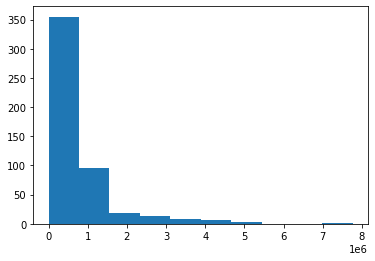

    rozkład test  Wartość statystyki   p value
0  Weibulla   KS                0.08  0.001437
1  Weibulla   CM                0.51  0.037898
-0.07922893559021643 275203.25662999536


c:\Users\ndzad\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


2.0648177120321627 0.03837002023697435
  rozkład test  Wartość statystyki        p value
0   Burra   KS                0.50  1.711060e-120
1   Burra   CM               39.67   9.296288e-09


In [727]:
%run "C:\Users\ndzad\Dropbox\MINI\Magisterka\repo\mgr\DataPreparation.ipynb"
%run "C:\Users\ndzad\Dropbox\MINI\Magisterka\repo\mgr\Modelowanie_liczby_roszczen.ipynb"
%run "C:\Users\ndzad\Dropbox\MINI\Magisterka\repo\mgr\Modelowanie_wartosci_odszkodowan.ipynb"
#%run "C:\Users\ndzad\Dropbox\MINI\Magisterka\repo\mgr\Modelowanie_wartosci_ryzyka.ipynb"

### Symulacja liczby roszczeń

Empiryczna liczba roszczeń ze zbioru danych

Zbiór treningowy

In [34]:
n = pd.Series(train.groupby('Year').count()['Dis No']) #n jest hard-kodowane w definicjach funkcji sum_of_squares_sin i sum_of_squares_exp
n.index = range(1,len(n)+1)
n

1     17
2     28
3     29
4     25
5     11
6     18
7     12
8     26
9     26
10    16
11     7
12    10
13    13
14    13
15    13
16     9
17    12
18    22
19    13
20    10
21     9
22    16
23    20
Name: Dis No, dtype: int64

In [3]:
N = np.cumsum(n)
N

1      17
2      45
3      74
4      99
5     110
6     128
7     140
8     166
9     192
10    208
11    215
12    225
13    238
14    251
15    264
16    273
17    285
18    307
19    320
20    330
21    339
22    355
23    375
Name: Dis No, dtype: int64

Zbiór testowy

In [4]:
n_test = pd.Series(test.groupby('Year').count()['Dis No']) #n jest hard-kodowane w definicjach funkcji sum_of_squares_sin i sum_of_squares_exp
n_test.index = range(1,len(n_test)+1)
N_test = np.cumsum(n_test)

Sinusoidalna funkcja intensywności

In [6]:
N

1      17
2      45
3      74
4      99
5     110
6     128
7     140
8     166
9     192
10    208
11    215
12    225
13    238
14    251
15    264
16    273
17    285
18    307
19    320
20    330
21    339
22    355
23    375
Name: Dis No, dtype: int64

In [47]:
bnds = ((0, None), (0, None), (0, None)) # ograniczenia na wartości parametrów
params = [1.0, 1.0, 1.0] # Przyjmujemy początkowe wartości parametrów
result = minimize(nhpp_sin, params, bounds=bnds, method='Powell')
nhpp_pred = nhpp(sin_int_fun,result.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred = pd.Series(merged_table['n'])
N_pred = np.cumsum(n_pred)
print(result.x)
print(n_pred)

[17.14462331  1.78733124  1.95302682]
Year
2013    14
2014    22
2015    13
2016    29
2017     9
2018    23
2019    13
2020    16
2021    18
2022    21
Name: n, dtype: int64


In [50]:
print("MSE: ", MSE(n_test,n_pred), "MAE: ", MAE(n_test,n_pred))

MSE:  190.6 MAE:  12.2


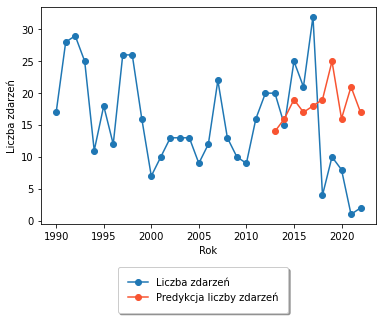

In [52]:
plt.plot(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023)), linestyle= '-',marker='o')
nhpp_pred = nhpp(sin_int_fun,result.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred = pd.Series(merged_table['n'])
plt.plot(n_pred, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
plt.figlegend(['Liczba zdarzeń','Predykcja liczby zdarzeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\sin_number_1.pdf")
plt.show()

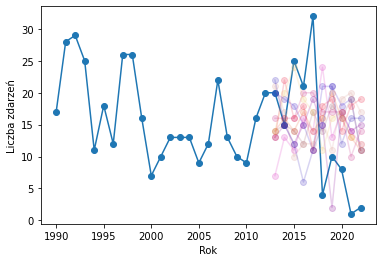

In [8]:
plt.plot(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023)), linestyle= '-',marker='o')
for i in range(10):
    random_color = (random.randint(0, 255)/255, random.randint(0, 255)/255, random.randint(0, 255)/255,0.2)
    nhpp_pred = nhpp(sin_int_fun,result.x,11)
    unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
    values = pd.DataFrame({'Year':2012+unique, 'n':counts})
    index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
    merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
    n_pred = pd.Series(merged_table['n'])
    plt.plot(n_pred, linestyle= '-',marker='o',color=random_color)
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\sin_number_10.pdf")
plt.show()

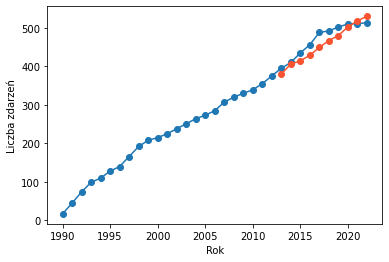

In [9]:
plt.plot(np.cumsum(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023))), linestyle= '-',marker='o')
nhpp_pred = nhpp(sin_int_fun,result.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred = pd.Series(merged_table['n'])
plt.plot(np.cumsum(n)[23]+np.cumsum(n_pred), linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\sin_cum_number_1.pdf")
plt.show()

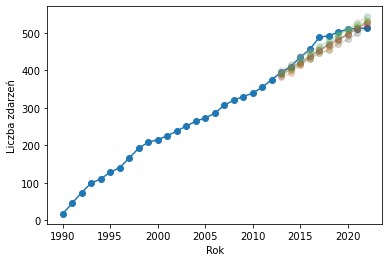

In [10]:
plt.plot(np.cumsum(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023))), linestyle= '-',marker='o')
for i in range(10):
    random_color = (random.randint(0, 255)/255, random.randint(0, 255)/255, random.randint(0, 255)/255,0.2)
    nhpp_pred = nhpp(sin_int_fun,result.x,11)
    unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
    values = pd.DataFrame({'Year':2012+unique, 'n':counts})
    index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
    merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
    n_pred = pd.Series(merged_table['n'])
    plt.plot(np.cumsum(n)[23]+np.cumsum(n_pred), linestyle= '-',marker='o',color=random_color)
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\sin_cum_number_10.pdf")
plt.show()

Funkcja intensywności typu Power Law

In [56]:
bnds = ((0, None), (0, 1)) # ograniczenia na wartości parametrów
params = [1.0, 1.0] # Przyjmujemy początkowe wartości parametrów
result = minimize(sum_of_squares_power_law, params, bounds=bnds, method='L-BFGS-B')
nhpp_pred = nhpp(power_law_int_fun,result.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred = pd.Series(merged_table['n'])
N_pred = np.cumsum(n_pred)
print(result.x)
print(n_pred)

[22.  1.]
Year
2013    22
2014    21
2015    14
2016    23
2017    20
2018    24
2019    24
2020    25
2021    15
2022    23
Name: n, dtype: int64


C:\Users\ndzad\AppData\Local\Temp/ipykernel_15348/847667322.py:18: RuntimeWarning: divide by zero encountered in power
  return lambda_func_params[0]*lambda_func_params[1]*t**(lambda_func_params[1]-1), lambda_func_params[0]*lambda_func_params[1]
C:\Users\ndzad\AppData\Local\Temp/ipykernel_15348/847667322.py:18: RuntimeWarning: invalid value encountered in multiply
  return lambda_func_params[0]*lambda_func_params[1]*t**(lambda_func_params[1]-1), lambda_func_params[0]*lambda_func_params[1]


In [57]:
print("MSE: ", MSE(n_test,n_pred), "MAE: ", MAE(n_test,n_pred))

MSE:  183.1 MAE:  11.9


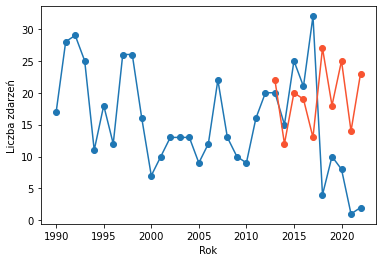

In [58]:
plt.plot(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023)), linestyle= '-',marker='o')
nhpp_pred = nhpp(power_law_int_fun,result.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred = pd.Series(merged_table['n'])
plt.plot(n_pred, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\power_law_number_1.pdf")
plt.show()

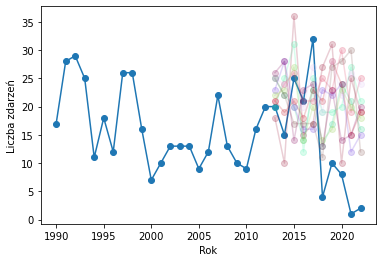

In [59]:
plt.plot(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023)), linestyle= '-',marker='o')
for i in range(10):
    random_color = (random.randint(0, 255)/255, random.randint(0, 255)/255, random.randint(0, 255)/255,0.2)
    nhpp_pred = nhpp(power_law_int_fun,result.x,11)
    unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
    values = pd.DataFrame({'Year':2012+unique, 'n':counts})
    index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
    merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
    n_pred = pd.Series(merged_table['n'])
    plt.plot(n_pred, linestyle= '-',marker='o',color=random_color)
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\power_law_number_10.pdf")
plt.show()

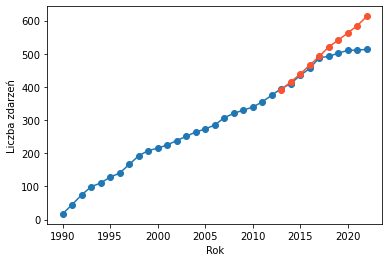

In [60]:
plt.plot(np.cumsum(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023))), linestyle= '-',marker='o')
nhpp_pred = nhpp(power_law_int_fun,result.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred = pd.Series(merged_table['n'])
plt.plot(np.cumsum(n)[23]+np.cumsum(n_pred), linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\power_law_cum_number_1.pdf")
plt.show()

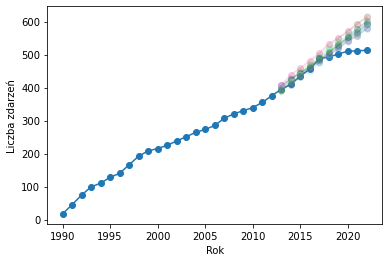

In [61]:
plt.plot(np.cumsum(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023))), linestyle= '-',marker='o')
for i in range(10):
    random_color = (random.randint(0, 255)/255, random.randint(0, 255)/255, random.randint(0, 255)/255,0.2)
    nhpp_pred = nhpp(power_law_int_fun,result.x,11)
    unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
    values = pd.DataFrame({'Year':2012+unique, 'n':counts})
    index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
    merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
    n_pred = pd.Series(merged_table['n'])
    plt.plot(np.cumsum(n)[23]+np.cumsum(n_pred), linestyle= '-',marker='o',color=random_color)
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\power_law_cum_number_10.pdf")
plt.show()

Funkcja intensywności Musa-Okumoto

In [29]:
bnds = ((0, None), (0, None)) # ograniczenia na wartości parametrów
params = [1.0, 1.0] # Przyjmujemy początkowe wartości parametrów
result = minimize(sum_of_squares_musa_okumoto, params, bounds=bnds, method='L-BFGS-B')
nhpp_pred = nhpp(musa_okumoto_int_fun,result.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred = pd.Series(merged_table['n'])
N_pred = np.cumsum(n_pred)
print(result.x)
print(n_pred)

[5.08938892e+02 4.61168818e-02]
Year
2013    23
2014    27
2015    22
2016    15
2017    24
2018    16
2019    20
2020    17
2021    18
2022    18
Name: n, dtype: int64


In [30]:
print("MSE: ", MSE(n_test,n_pred), "MAE: ", MAE(n_test,n_pred))

MSE:  113.2 MAE:  9.6


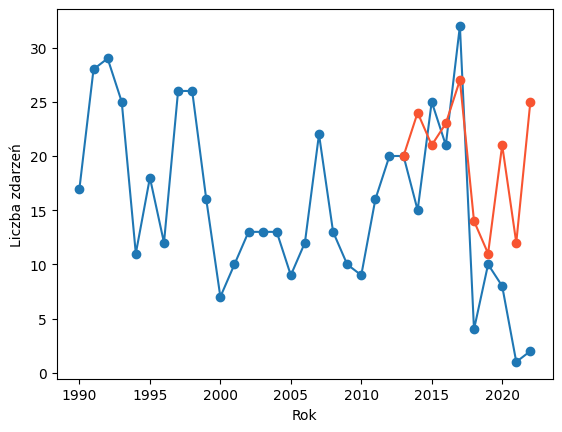

In [35]:
plt.plot(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023)), linestyle= '-',marker='o')
nhpp_pred = nhpp(musa_okumoto_int_fun,result.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred = pd.Series(merged_table['n'])
plt.plot(n_pred, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\musa_okumoto_number_1.pdf")
plt.show()

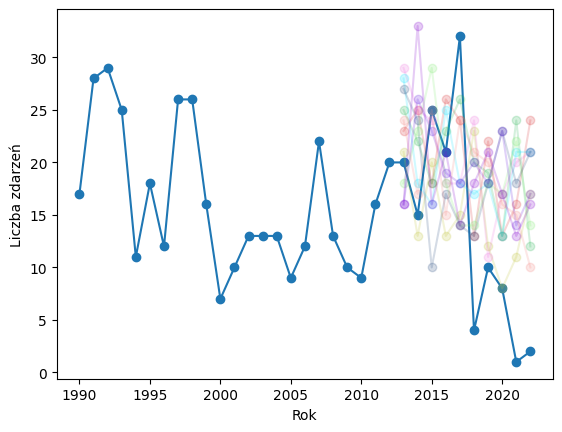

In [36]:
plt.plot(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023)), linestyle= '-',marker='o')
for i in range(10):
    random_color = (random.randint(0, 255)/255, random.randint(0, 255)/255, random.randint(0, 255)/255,0.2)
    nhpp_pred = nhpp(musa_okumoto_int_fun,result.x,11)
    unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
    values = pd.DataFrame({'Year':2012+unique, 'n':counts})
    index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
    merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
    n_pred = pd.Series(merged_table['n'])
    plt.plot(n_pred, linestyle= '-',marker='o',color=random_color)
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\musa_okumoto_number_10.pdf")
plt.show()

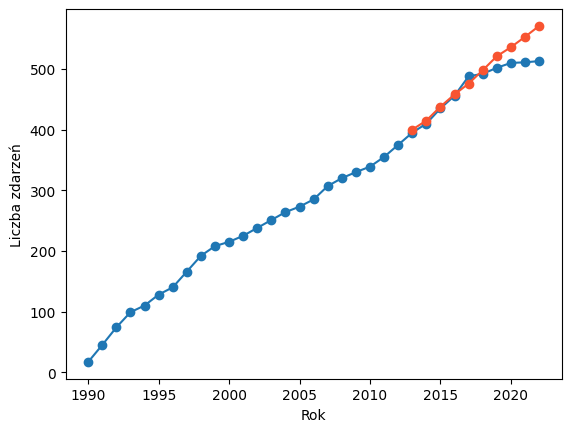

In [37]:
plt.plot(np.cumsum(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023))), linestyle= '-',marker='o')
nhpp_pred = nhpp(musa_okumoto_int_fun,result.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred = pd.Series(merged_table['n'])
plt.plot(np.cumsum(n)[23]+np.cumsum(n_pred), linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\musa_okumoto_cum_number_1.pdf")
plt.show()

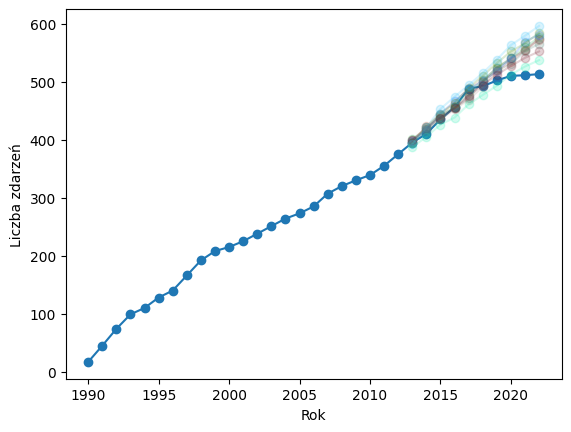

In [38]:
plt.plot(np.cumsum(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023))), linestyle= '-',marker='o')
for i in range(10):
    random_color = (random.randint(0, 255)/255, random.randint(0, 255)/255, random.randint(0, 255)/255,0.2)
    nhpp_pred = nhpp(musa_okumoto_int_fun,result.x,11)
    unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
    values = pd.DataFrame({'Year':2012+unique, 'n':counts})
    index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
    merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
    n_pred = pd.Series(merged_table['n'])
    plt.plot(np.cumsum(n)[23]+np.cumsum(n_pred), linestyle= '-',marker='o',color=random_color)
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\musa_okumoto_cum_number_10.pdf")
plt.show()

Symulacje dla wszystkich funkcji

In [54]:
number_of_simulations = 1000

In [155]:
# Sinusoidalna funkcja intensywności

bnds = ((0, None), (0, None), (0, None)) # ograniczenia na wartości parametrów
params = [1.0, 1.0, 1.0] # Przyjmujemy początkowe wartości parametrów
result_sin = minimize(nhpp_sin, params, bounds=bnds, method='Powell')
n_sum = pd.Series(0, index=range(2013,2023))
for i in range (number_of_simulations):
    nhpp_pred = nhpp(sin_int_fun,result_sin.x,11)
    unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
    values = pd.DataFrame({'Year':2012+unique, 'n':counts})
    index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
    merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
    n_pred = pd.Series(merged_table['n'])
    n_sum = n_sum + n_pred
n_avg_sin = n_sum/number_of_simulations

In [156]:
# Funkcja intensywności typu Power Law

bnds = ((0, None), (0, 1)) # ograniczenia na wartości parametrów
params = [1.0, 1.0] # Przyjmujemy początkowe wartości parametrów
result_power_law = minimize(nhpp_power_law, params, bounds=bnds, method='Powell')
n_sum = pd.Series(0, index=range(2013,2023))
for i in range (number_of_simulations):
    nhpp_pred = nhpp(power_law_int_fun,result_power_law.x,11)
    unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
    values = pd.DataFrame({'Year':2012+unique, 'n':counts})
    index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
    merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
    n_pred = pd.Series(merged_table['n'])
    n_sum = n_sum + n_pred
n_avg_power_law = n_sum/number_of_simulations

C:\Users\ndzad\AppData\Local\Temp/ipykernel_10756/847667322.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  return lambda_func_params[0]*lambda_func_params[1]*t**(lambda_func_params[1]-1), lambda_func_params[0]*lambda_func_params[1]


In [158]:
# Funkcja intensywności Musa Okumoto

bnds = ((0, None), (0, None)) # ograniczenia na wartości parametrów
params = [1.0, 1.0] # Przyjmujemy początkowe wartości parametrów
result_musa_okumoto = minimize(nhpp_musa_okumoto, params, bounds=bnds, method='Powell')
n_sum = pd.Series(0, index=range(2013,2023))
for i in range (number_of_simulations):
    nhpp_pred = nhpp(musa_okumoto_int_fun,result_musa_okumoto.x,11)
    unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
    values = pd.DataFrame({'Year':2012+unique, 'n':counts})
    index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
    merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
    n_pred = pd.Series(merged_table['n'])
    n_sum = n_sum + n_pred
n_avg_musa_okumoto = n_sum/number_of_simulations

In [ ]:
#Wyniki

print(pd.DataFrame
({
    'funkcja':['Sinusoidalna funkcja straty','Power Law','Musa Okumoto'],
    'parametry':[result_sin.x.round(2),result_power_law.x.round(2),result_musa_okumoto.x.round(2)],
    'MSE':[round(MSE(n_test,n_avg_sin),2),round(MSE(n_test,n_avg_power_law),2),round(MSE(n_test,n_avg_musa_okumoto),2)],
    'MAE':[round(MAE(n_test,n_avg_sin),2),round(MAE(n_test,n_avg_power_law),2),round(MAE(n_test,n_avg_musa_okumoto),2)]                                            
}))

                       funkcja             parametry     MSE    MAE
0  Sinusoidalna funkcja straty  [-0.66, 9.49, -0.07]  125.52   9.63
1                    Power Law           [4.3, 3.94]  131.70  10.38
2                 Musa Okumoto           [4.5, 3.27]  239.41  12.21


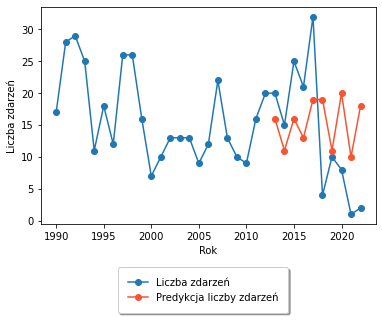

In [165]:
plt.plot(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023)), linestyle= '-',marker='o')
nhpp_pred = nhpp(sin_int_fun,result_sin.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred_sin = pd.Series(merged_table['n'])
plt.plot(n_pred_sin, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
plt.figlegend(['Liczba zdarzeń','Predykcja liczby zdarzeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\sin_number.pdf",bbox_inches='tight')
plt.show()

C:\Users\ndzad\AppData\Local\Temp/ipykernel_10756/847667322.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  return lambda_func_params[0]*lambda_func_params[1]*t**(lambda_func_params[1]-1), lambda_func_params[0]*lambda_func_params[1]


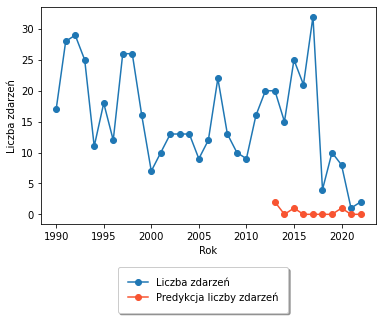

In [166]:
plt.plot(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023)), linestyle= '-',marker='o')
nhpp_pred = nhpp(power_law_int_fun,result_power_law.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred_power_law = pd.Series(merged_table['n'])
plt.plot(n_pred_power_law, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
plt.figlegend(['Liczba zdarzeń','Predykcja liczby zdarzeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\power_law_number.pdf",bbox_inches='tight')
plt.show()

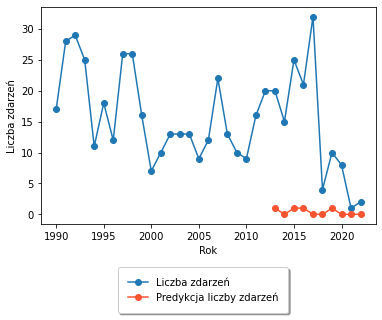

In [167]:
plt.plot(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023)), linestyle= '-',marker='o')
nhpp_pred = nhpp(musa_okumoto_int_fun,result_musa_okumoto.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred_musa_okumoto = pd.Series(merged_table['n'])
plt.plot(n_pred_musa_okumoto, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
plt.figlegend(['Liczba zdarzeń','Predykcja liczby zdarzeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\musa_okumoto_number.pdf",bbox_inches='tight')
plt.show()

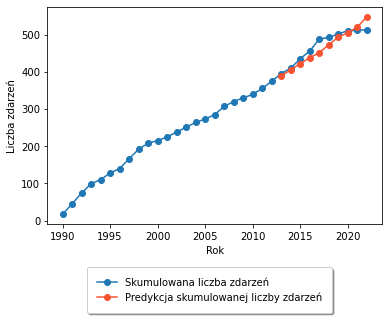

In [223]:
plt.plot(np.cumsum(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023))), linestyle= '-',marker='o')
nhpp_pred = nhpp(sin_int_fun,result_sin.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred_sin = pd.Series(merged_table['n'])
plt.plot(np.cumsum(n)[23]+np.cumsum(n_pred_sin), linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
plt.figlegend(['Skumulowana liczba zdarzeń','Predykcja skumulowanej liczby zdarzeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\sin_cum_number.pdf",bbox_inches='tight')
plt.show()

C:\Users\ndzad\AppData\Local\Temp/ipykernel_10756/847667322.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  return lambda_func_params[0]*lambda_func_params[1]*t**(lambda_func_params[1]-1), lambda_func_params[0]*lambda_func_params[1]


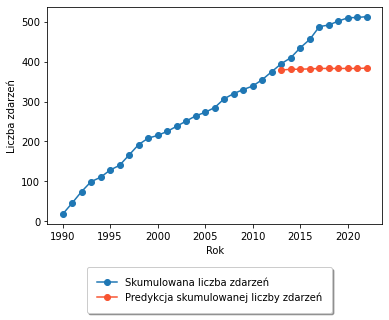

In [169]:
plt.plot(np.cumsum(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023))), linestyle= '-',marker='o')
nhpp_pred = nhpp(power_law_int_fun,result_power_law.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred_power_law = pd.Series(merged_table['n'])
plt.plot(np.cumsum(n)[23]+np.cumsum(n_pred_power_law), linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
plt.figlegend(['Skumulowana liczba zdarzeń','Predykcja skumulowanej liczby zdarzeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\power_law_cum_number.pdf",bbox_inches='tight')
plt.show()

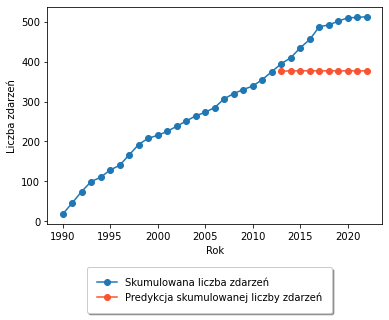

In [170]:
plt.plot(np.cumsum(pd.Series(np.concatenate((np.asarray(n),np.asarray(n_test)),axis=0),index=range(1990,2023))), linestyle= '-',marker='o')
nhpp_pred = nhpp(musa_okumoto_int_fun,result_musa_okumoto.x,11)
unique, counts = np.unique(np.ceil(nhpp_pred[1]), return_counts=True)
values = pd.DataFrame({'Year':2012+unique, 'n':counts})
index_df = pd.DataFrame({'Year':np.array(range(2013,2023))})
merged_table = pd.merge(index_df, values, on='Year', how='left').fillna(0).set_index('Year')
n_pred_musa_okumoto = pd.Series(merged_table['n'])
plt.plot(np.cumsum(n)[23]+np.cumsum(n_pred_musa_okumoto), linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Liczba zdarzeń")
plt.figlegend(['Skumulowana liczba zdarzeń','Predykcja skumulowanej liczby zdarzeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\musa_okumoto_cum_number.pdf",bbox_inches='tight')
plt.show()

### Symulacja wartości odszkodowań

Dane zaobserwowane

In [237]:
loss_full = pd.DataFrame({"n":pd.Series(data_wo.groupby('Year').count()['Dis No']), "Damages":pd.Series(data_wo.groupby('Year').sum()["Insured Damages, Adjusted (\'000 US$)"])})
cum_loss_full = loss_full.cumsum()

In [231]:
loss_train= pd.DataFrame({"n":pd.Series(train.groupby('Year').count()['Dis No']), "Damages":pd.Series(train.groupby('Year').sum()["Insured Damages, Adjusted (\'000 US$)"])})
cum_loss_train = loss_train.cumsum()

In [227]:
loss_test= pd.DataFrame({"n":pd.Series(test.groupby('Year').count()['Dis No']), "Damages":pd.Series(test.groupby('Year').sum()["Insured Damages, Adjusted (\'000 US$)"])})
cum_loss_test = loss_test.cumsum()

Rozkład wykładniczy

In [216]:
#Sinusoidalna funkcja intensywności

loss_sin_exp = pd.DataFrame({"n":n_pred_sin, "Damages":[np.sum(stats.expon.rvs(scale=1/lambda_hat,loc=0,size=np.sum(n_pred_sin[i]))) for i in range(2013,2023)]})
cum_loss_sin_exp = loss_sin_exp.cumsum()

In [244]:
#Funkcja intensywności typu Power Law

loss_power_law_exp = pd.DataFrame({"n":n_pred_power_law, "Damages":[np.sum(stats.expon.rvs(scale=1/lambda_hat,loc=0,size=np.sum(int(n_pred_power_law[i])))) for i in range(2013,2023)]})
cum_loss_power_law_exp = loss_power_law_exp.cumsum()

In [247]:
#Funkcja intensywności Musa Okumoto

loss_musa_okumoto_exp = pd.DataFrame({"n":n_pred_musa_okumoto, "Damages":[np.sum(stats.expon.rvs(scale=1/lambda_hat,loc=0,size=np.sum(int(n_pred_musa_okumoto[i])))) for i in range(2013,2023)]})
cum_loss_musa_okumoto_exp = loss_musa_okumoto_exp.cumsum()

Rozkład lognormalny

In [250]:
#Sinusoidalna funkcja intensywności

loss_sin_ln = pd.DataFrame({"n":n_pred_sin, "Damages":[np.sum(stats.lognorm.rvs(s=np.sqrt(sigma_sq_hat),scale=np.exp(mu_hat),size=np.sum(int(n_pred_sin[i])))) for i in range(2013,2023)]})
cum_loss_sin_ln = loss_sin_ln.cumsum()

In [251]:
#Funkcja intensywności typu Power Law

loss_power_law_ln = pd.DataFrame({"n":n_pred_power_law, "Damages":[np.sum(stats.lognorm.rvs(s=np.sqrt(sigma_sq_hat),scale=np.exp(mu_hat),size=np.sum(int(n_pred_power_law[i])))) for i in range(2013,2023)]})
cum_loss_power_law_ln = loss_power_law_ln.cumsum()

In [252]:
#Funkcja intensywności Musa Okumoto

loss_musa_okumoto_ln = pd.DataFrame({"n":n_pred_musa_okumoto, "Damages":[np.sum(stats.lognorm.rvs(s=np.sqrt(sigma_sq_hat),scale=np.exp(mu_hat),size=np.sum(int(n_pred_musa_okumoto[i])))) for i in range(2013,2023)]})
cum_loss_musa_okumoto_ln = loss_musa_okumoto_ln.cumsum()

Rozkład gamma

In [442]:
#Sinusoidalna funkcja intensywności

loss_sin_gamma = pd.DataFrame({"n":n_pred_sin, "Damages":[np.sum(stats.gamma.rvs(a=gamma_alfa,scale=1/gamma_beta,size=np.sum(int(n_pred_sin[i])))) for i in range(2013,2023)]})
cum_loss_sin_gamma = loss_sin_gamma.cumsum()

In [443]:
#Funkcja intensywności typu Power Law

loss_power_law_gamma = pd.DataFrame({"n":n_pred_power_law, "Damages":[np.sum(stats.gamma.rvs(a=gamma_alfa,scale=1/gamma_beta,size=np.sum(int(n_pred_power_law[i])))) for i in range(2013,2023)]})
cum_loss_power_law_gamma = loss_power_law_gamma.cumsum()

In [444]:
#Funkcja intensywności Musa Okumoto

loss_musa_okumoto_gamma = pd.DataFrame({"n":n_pred_musa_okumoto, "Damages":[np.sum(stats.gamma.rvs(a=gamma_alfa,scale=1/gamma_beta,size=np.sum(int(n_pred_musa_okumoto[i])))) for i in range(2013,2023)]})
cum_loss_musa_okumoto_gamma = loss_musa_okumoto_gamma.cumsum()

Rozkład Weibulla

In [455]:
#Sinusoidalna funkcja intensywności

loss_sin_weibull = pd.DataFrame({"n":n_pred_sin, "Damages":[np.sum(stats.weibull_min.rvs(c=weibull_k,scale=weibull_lambda,size=np.sum(int(n_pred_sin[i])))) for i in range(2013,2023)]})
cum_loss_sin_weibull = loss_sin_weibull.cumsum()

In [456]:
#Funkcja intensywności typu Power Law

loss_power_law_weibull = pd.DataFrame({"n":n_pred_power_law, "Damages":[np.sum(stats.weibull_min.rvs(c=weibull_k,scale=weibull_lambda,size=np.sum(int(n_pred_power_law[i])))) for i in range(2013,2023)]})
cum_loss_power_law_weibull = loss_power_law_weibull.cumsum()

In [457]:
#Funkcja intensywności Musa Okumoto

loss_musa_okumoto_weibull = pd.DataFrame({"n":n_pred_musa_okumoto, "Damages":[np.sum(stats.weibull_min.rvs(c=weibull_k,scale=weibull_lambda,size=np.sum(int(n_pred_musa_okumoto[i])))) for i in range(2013,2023)]})
cum_loss_musa_okumoto_weibull = loss_musa_okumoto_weibull.cumsum()

Rozkad Burra

In [475]:
#Sinusoidalna funkcja intensywności

loss_sin_burr = pd.DataFrame({"n":n_pred_sin, "Damages":[np.sum(stats.burr12.rvs(c=burr_c,d=burr_k,size=np.sum(int(n_pred_sin[i])))) for i in range(2013,2023)]})
cum_loss_sin_burr = loss_sin_burr.cumsum()

In [476]:
#Funkcja intensywności typu Power Law

loss_power_law_burr = pd.DataFrame({"n":n_pred_power_law, "Damages":[np.sum(stats.burr12.rvs(c=burr_c,d=burr_k,size=np.sum(int(n_pred_power_law[i])))) for i in range(2013,2023)]})
cum_loss_power_law_burr = loss_power_law_burr.cumsum()

In [477]:
#Funkcja intensywności Musa Okumoto

loss_musa_okumoto_burr = pd.DataFrame({"n":n_pred_musa_okumoto, "Damages":[np.sum(stats.burr12.rvs(c=burr_c,d=burr_k,size=np.sum(int(n_pred_musa_okumoto[i])))) for i in range(2013,2023)]})
cum_loss_musa_okumoto_burr = loss_musa_okumoto_burr.cumsum()

### Symulacja strat

Rozkład wykładniczy

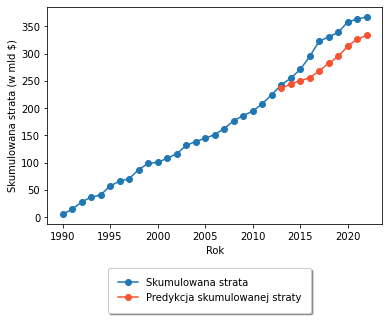

In [493]:
#Sinusoidalna funkcja intensywności

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_exp["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_exp_sin.pdf",bbox_inches='tight')
plt.show()

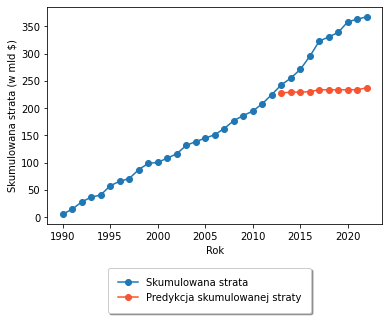

In [245]:
#Funkcja intensywności typu Power Law

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_power_law_exp["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_exp_power_law.pdf",bbox_inches='tight')
plt.show()

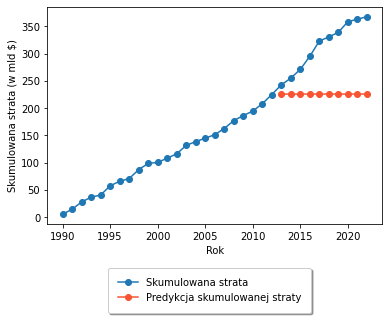

In [248]:
#Funkcja intensywności Musa Okumoto

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_musa_okumoto_exp["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_exp_musa_okumoto.pdf",bbox_inches='tight')
plt.show()

In [275]:
#Wyniki

print(pd.DataFrame
({
    'rozkład':['Wykładniczy','Wykładniczy','Wykładniczy'],
    'funkcja':['Sinusoidalna funkcja straty','Power Law','Musa Okumoto'],
    'MSE':["{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_sin_exp["Damages"])),"{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_power_law_exp["Damages"])),"{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_musa_okumoto_exp["Damages"]))],
    'MAE':["{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_sin_exp["Damages"])),"{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_power_law_exp["Damages"])),"{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_musa_okumoto_exp["Damages"]))]                                            
}))

       rozkład                      funkcja           MSE           MAE
0  Wykładniczy  Sinusoidalna funkcja straty  1.384578e+15  3.387880e+07
1  Wykładniczy                    Power Law  8.462475e+15  8.233337e+07
2  Wykładniczy                 Musa Okumoto  9.775144e+15  8.875588e+07


Rozkład lognormalny

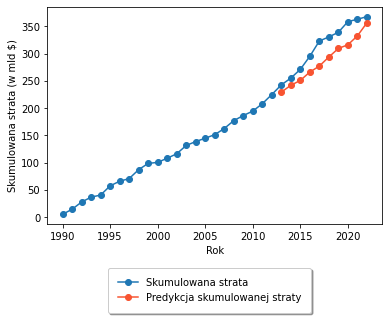

In [492]:
#Sinusoidalna funkcja intensywności

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_ln["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_ln_sin.pdf",bbox_inches='tight')
plt.show()

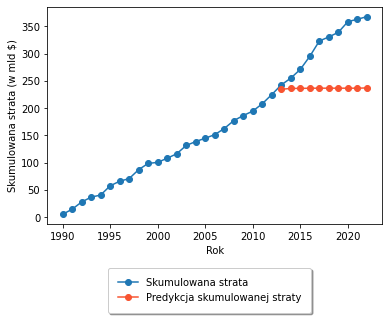

In [256]:
#Funkcja intensywności typu Power Law

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_power_law_ln["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_ln_power_law.pdf",bbox_inches='tight')
plt.show()

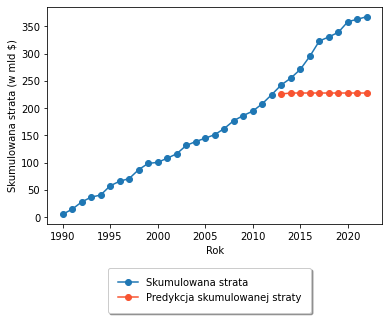

In [257]:
#Funkcja intensywności Musa Okumoto

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_musa_okumoto_ln["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_ln_musa_okumoto.pdf",bbox_inches='tight')
plt.show()

In [276]:
#Wyniki

print(pd.DataFrame
({
    'rozkład':['Lognormalny','Lognormalny','Lognormalny'],
    'funkcja':['Sinusoidalna funkcja straty','Power Law','Musa Okumoto'],
    'MSE':["{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_sin_ln["Damages"])),"{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_power_law_ln["Damages"])),"{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_musa_okumoto_ln["Damages"]))],
    'MAE':["{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_sin_ln["Damages"])),"{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_power_law_ln["Damages"])),"{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_musa_okumoto_ln["Damages"]))]                                            
}))

       rozkład                      funkcja           MSE           MAE
0  Lognormalny  Sinusoidalna funkcja straty  6.214250e+14  2.265560e+07
1  Lognormalny                    Power Law  7.978583e+15  7.823024e+07
2  Lognormalny                 Musa Okumoto  9.448300e+15  8.701622e+07


Rozkład gamma

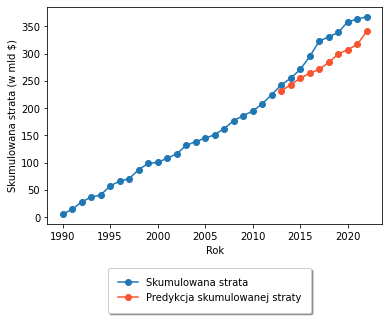

In [445]:
#Sinusoidalna funkcja intensywności

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_gamma["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_gamma_sin.pdf",bbox_inches='tight')
plt.show()

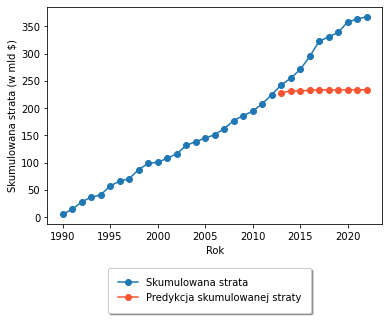

In [446]:
#Funkcja intensywności typu Power Law

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_power_law_gamma["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_gamma_power_law.pdf",bbox_inches='tight')
plt.show()

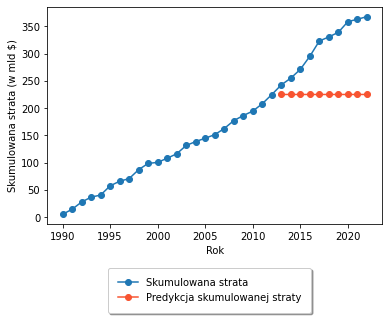

In [447]:
#Funkcja intensywności Musa Okumoto

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_musa_okumoto_gamma["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_gamma_musa_okumoto.pdf",bbox_inches='tight')
plt.show()

In [448]:
#Wyniki

print(pd.DataFrame
({
    'rozkład':['Gamma','Gamma','Gamma'],
    'funkcja':['Sinusoidalna funkcja straty','Power Law','Musa Okumoto'],
    'MSE':["{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_sin_gamma["Damages"])),"{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_power_law_gamma["Damages"])),"{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_musa_okumoto_gamma["Damages"]))],
    'MAE':["{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_sin_gamma["Damages"])),"{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_power_law_gamma["Damages"])),"{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_musa_okumoto_gamma["Damages"]))]                                            
}))

  rozkład                      funkcja           MSE           MAE
0   Gamma  Sinusoidalna funkcja straty  1.333974e+15  3.315659e+07
1   Gamma                    Power Law  8.513976e+15  8.205047e+07
2   Gamma                 Musa Okumoto  9.910751e+15  8.949541e+07


Rozkład Weibulla

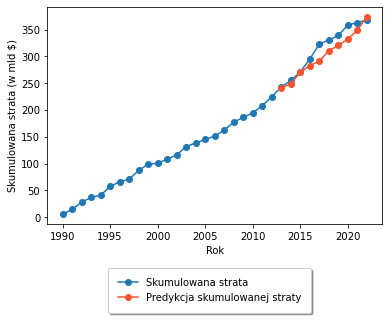

In [458]:
#Sinusoidalna funkcja intensywności

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_weibull["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_weibull_sin.pdf",bbox_inches='tight')
plt.show()

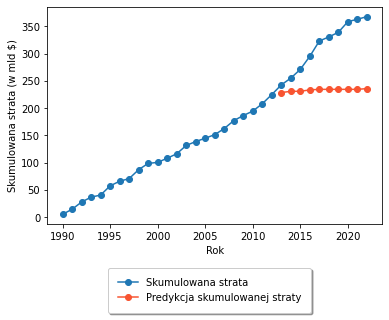

In [459]:
#Funkcja intensywności typu Power Law

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_power_law_weibull["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_weibull_power_law.pdf",bbox_inches='tight')
plt.show()

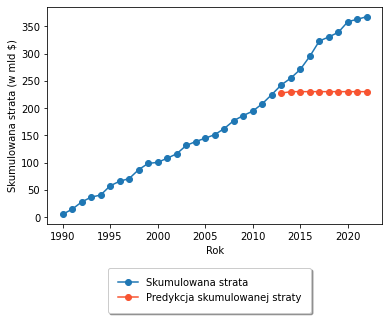

In [460]:
#Funkcja intensywności Musa Okumoto

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_musa_okumoto_weibull["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_weibull_musa_okumoto.pdf",bbox_inches='tight')
plt.show()

In [461]:
#Wyniki

print(pd.DataFrame
({
    'rozkład':['Weibull','Weibull','Weibull'],
    'funkcja':['Sinusoidalna funkcja straty','Power Law','Musa Okumoto'],
    'MSE':["{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_sin_weibull["Damages"])),"{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_power_law_weibull["Damages"])),"{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_musa_okumoto_weibull["Damages"]))],
    'MAE':["{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_sin_weibull["Damages"])),"{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_power_law_weibull["Damages"])),"{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_musa_okumoto_weibull["Damages"]))]                                            
}))

   rozkład                      funkcja           MSE           MAE
0  Weibull  Sinusoidalna funkcja straty  2.891791e+14  1.376851e+07
1  Weibull                    Power Law  8.353547e+15  8.138875e+07
2  Weibull                 Musa Okumoto  9.025301e+15  8.462903e+07


Rozkład Burra

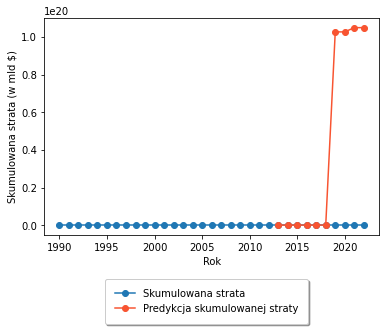

In [488]:
#Sinusoidalna funkcja intensywności

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_burr["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_burr_sin.pdf",bbox_inches='tight')
plt.show()

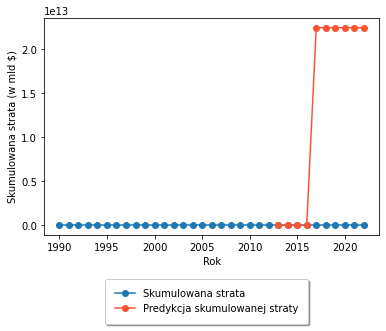

In [489]:
#Funkcja intensywności typu Power Law

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_power_law_burr["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_burr_power_law.pdf",bbox_inches='tight')
plt.show()

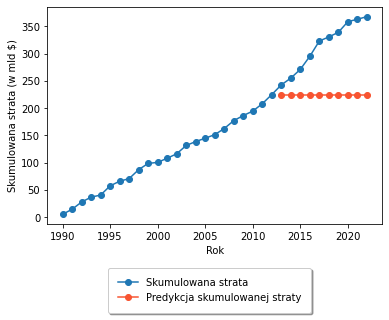

In [490]:
#Funkcja intensywności Musa Okumoto

plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_musa_okumoto_burr["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_burr_musa_okumoto.pdf",bbox_inches='tight')
plt.show()

In [491]:
# Wyniki

print(pd.DataFrame
({
    'rozkład':['Burr','Burr','Burr'],
    'funkcja':['Sinusoidalna funkcja straty','Power Law','Musa Okumoto'],
    'MSE':["{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_sin_burr["Damages"])),"{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_power_law_burr["Damages"])),"{:e}".format(MSE(cum_loss_test["Damages"],cum_loss_musa_okumoto_burr["Damages"]))],
    'MAE':["{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_sin_burr["Damages"])),"{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_power_law_burr["Damages"])),"{:e}".format(MAE(cum_loss_test["Damages"],cum_loss_musa_okumoto_burr["Damages"]))]                                            
}))

  rozkład                      funkcja           MSE           MAE
0    Burr  Sinusoidalna funkcja straty  4.315389e+51  4.161815e+25
1    Burr                    Power Law  3.019670e+38  1.346045e+19
2    Burr                 Musa Okumoto  9.941539e+15  8.966598e+07


### Proces ryzyka

In [418]:
def risk_process(u, theta, mu, X, n, lambda_func, lambda_func_params, t_max):
    """
    Funkcja generuje niejednorodny proces Poissona metodą przerzerzedzania.

    Argumenty:
        u: float
            Kapitał początkowy
        theta: float
            Narzut
        mu: float
            Wartość oczekiwana X
        X: numpy.ndarray
            Wartości odszkodowań
        N: numpy.ndaray
            Liczba roszczeń
        lambda_func: funkcja
            Funkcja intensywności
        lambda_func_params: tab
            Tablica zawierająca parametry funkcji intensywności
        t_max: float
            Maksymalny czas symulacji
    Zwraca:
        numpy.ndarray
            Tablica procesu ryzyka
    """
    I = integrate.quad(lambda x: lambda_func(x,lambda_func_params)[0],0, t_max)[0]
    C=(1+theta)*mu*I
    loss = pd.DataFrame({"n":n, "Damages":X})
    cum_loss = loss.cumsum()

    R = u + C - cum_loss["Damages"]
    return R

In [503]:
def ruin_prob(u, theta, mu, lambda_func, lambda_func_params, loss_distribution, t_max, n):
    """
    Funkcja generuje niejednorodny proces Poissona metodą przerzerzedzania.

    Argumenty:
        u: float
            Kapitał początkowy
        theta: float
            Narzut
        mu: float
            Wartość oczekiwana X
        lambda_func: funkcja
            Funkcja intensywności
        loss_distribution: string
            Rozkład strat
        t_max: float
            Maksymalny czas symulacji
        n: int
            Liczba symulacji
    Zwraca:
        numpy.ndarray
            Tablica procesu ryzyka
    """
    negative = 0

    for i in range(n):
        if lambda_func == sin_int_fun:
            n_pred =np.unique(np.ceil(nhpp(sin_int_fun,result_sin.x,t_max)[1]), return_counts=True)[1]
        elif lambda_func == power_law_int_fun:
            n_pred =np.unique(np.ceil(nhpp(power_law_int_fun,result_power_law.x,t_max)[1]), return_counts=True)[1]
        elif lambda_func == musa_okumoto_int_fun:
            n_pred =np.unique(np.ceil(nhpp(musa_okumoto_int_fun,result_musa_okumoto.x,t_max)[1]), return_counts=True)[1]
        if loss_distribution == "expon":
            X = [np.sum(stats.expon.rvs(scale=1/lambda_hat,loc=0,size=np.sum(i))) for i in n_pred]
        elif loss_distribution == "lognormal":
            X = [np.sum(stats.lognorm.rvs(s=np.sqrt(sigma_sq_hat),scale=np.exp(mu_hat),size=np.sum(i))) for i in n_pred]
        elif loss_distribution == "gamma":
            X = [np.sum(stats.gamma.rvs(a=gamma_alfa,scale=1/gamma_beta,size=np.sum(i))) for i in n_pred]
        elif loss_distribution == "weibull":
            X = [np.sum(stats.weibull_min.rvs(c=weibull_k,scale=weibull_lambda,size=np.sum(i))) for i in n_pred]
        elif loss_distribution == "burr":
            X = [np.sum(stats.burr12.rvs(c=burr_c,d=burr_k,size=np.sum(i))) for i in n_pred]
        R = risk_process(u, theta, mu, X, n_pred, lambda_func, lambda_func_params, t_max)
        if sum(R<0):
            negative += 1
    return(negative/n)

Sinusoidalna funkcja intensywności

In [505]:
rp_5_expon_sin = ruin_prob(1e7,0.3,1/lambda_hat,sin_int_fun,result_sin.x,"expon",5,10000)
rp_10_expon_sin = ruin_prob(1e7,0.3,1/lambda_hat,sin_int_fun,result_sin.x,"expon",10,10000)

In [506]:
rp_5_lognormal_sin = ruin_prob(1e7,0.3,np.exp(mu_hat+sigma_sq_hat/2),sin_int_fun,result_sin.x,"lognormal",5,10000)
rp_10_lognormal_sin = ruin_prob(1e7,0.3,np.exp(mu_hat+sigma_sq_hat/2),sin_int_fun,result_sin.x,"lognormal",10,10000)

In [507]:
rp_5_gamma_sin = ruin_prob(1e7,0.3,gamma_alfa/gamma_beta,sin_int_fun,result_sin.x,"gamma",5,10000)
rp_10_gamma_sin = ruin_prob(1e7,0.3,gamma_alfa/gamma_beta,sin_int_fun,result_sin.x,"gamma",10,10000)

In [508]:
rp_5_weibull_sin = ruin_prob(1e7,0.3,weibull_lambda*gamma(1+1/weibull_k),sin_int_fun,result_sin.x,"weibull",5,10000)
rp_10_weibull_sin = ruin_prob(1e7,0.3,weibull_lambda*gamma(1+1/weibull_k),sin_int_fun,result_sin.x,"weibull",10,10000)

In [509]:
rp_5_burr_sin = ruin_prob(1e7,0.3,burr_k*beta(burr_k-1/burr_c,1+1/burr_c),sin_int_fun,result_sin.x,"burr",5,10000)
rp_10_burr_sin = ruin_prob(1e7,0.3,burr_k*beta(burr_k-1/burr_c,1+1/burr_c),sin_int_fun,result_sin.x,"burr",10,10000)

Funkcja intensywności typu Power Law

In [510]:
rp_5_expon_power_law = ruin_prob(1e7,0.3,1/lambda_hat,power_law_int_fun,result_power_law.x,"expon",5,10000)
rp_10_expon_power_law = ruin_prob(1e7,0.3,1/lambda_hat,power_law_int_fun,result_power_law.x,"expon",10,10000)

C:\Users\ndzad\AppData\Local\Temp/ipykernel_10756/847667322.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  return lambda_func_params[0]*lambda_func_params[1]*t**(lambda_func_params[1]-1), lambda_func_params[0]*lambda_func_params[1]


In [511]:
rp_5_lognormal_power_law = ruin_prob(1e7,0.3,np.exp(mu_hat+sigma_sq_hat/2),power_law_int_fun,result_power_law.x,"lognormal",5,10000)
rp_10_lognormal_power_law = ruin_prob(1e7,0.3,np.exp(mu_hat+sigma_sq_hat/2),power_law_int_fun,result_power_law.x,"lognormal",10,10000)

C:\Users\ndzad\AppData\Local\Temp/ipykernel_10756/847667322.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  return lambda_func_params[0]*lambda_func_params[1]*t**(lambda_func_params[1]-1), lambda_func_params[0]*lambda_func_params[1]


In [512]:
rp_5_gamma_power_law = ruin_prob(1e7,0.3,gamma_alfa/gamma_beta,power_law_int_fun,result_power_law.x,"gamma",5,10000)
rp_10_gamma_power_law = ruin_prob(1e7,0.3,gamma_alfa/gamma_beta,power_law_int_fun,result_power_law.x,"gamma",10,10000)

C:\Users\ndzad\AppData\Local\Temp/ipykernel_10756/847667322.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  return lambda_func_params[0]*lambda_func_params[1]*t**(lambda_func_params[1]-1), lambda_func_params[0]*lambda_func_params[1]


In [513]:
rp_5_weibull_power_law = ruin_prob(1e7,0.3,weibull_lambda*gamma(1+1/weibull_k),power_law_int_fun,result_power_law.x,"weibull",5,10000)
rp_10_weibull_power_law = ruin_prob(1e7,0.3,weibull_lambda*gamma(1+1/weibull_k),power_law_int_fun,result_power_law.x,"weibull",10,10000)

C:\Users\ndzad\AppData\Local\Temp/ipykernel_10756/847667322.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  return lambda_func_params[0]*lambda_func_params[1]*t**(lambda_func_params[1]-1), lambda_func_params[0]*lambda_func_params[1]


In [514]:
rp_5_burr_power_law = ruin_prob(1e7,0.3,burr_k*beta(burr_k-1/burr_c,1+1/burr_c),power_law_int_fun,result_power_law.x,"burr",5,10000)
rp_10_burr_power_law = ruin_prob(1e7,0.3,burr_k*beta(burr_k-1/burr_c,1+1/burr_c),power_law_int_fun,result_power_law.x,"burr",10,10000)

C:\Users\ndzad\AppData\Local\Temp/ipykernel_10756/847667322.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  return lambda_func_params[0]*lambda_func_params[1]*t**(lambda_func_params[1]-1), lambda_func_params[0]*lambda_func_params[1]


Funkcja intensywności Musa Okumoto

In [515]:
rp_5_expon_musa_okumoto = ruin_prob(1e7,0.3,1/lambda_hat,musa_okumoto_int_fun,result_musa_okumoto.x,"expon",5,10000)
rp_10_expon_musa_okumoto = ruin_prob(1e7,0.3,1/lambda_hat,musa_okumoto_int_fun,result_musa_okumoto.x,"expon",10,10000)

In [516]:
rp_5_lognormal_musa_okumoto = ruin_prob(1e7,0.3,np.exp(mu_hat+sigma_sq_hat/2),musa_okumoto_int_fun,result_musa_okumoto.x,"lognormal",5,10000)
rp_10_lognormal_musa_okumoto = ruin_prob(1e7,0.3,np.exp(mu_hat+sigma_sq_hat/2),musa_okumoto_int_fun,result_musa_okumoto.x,"lognormal",10,10000)

In [517]:
rp_5_gamma_musa_okumoto = ruin_prob(1e7,0.3,gamma_alfa/gamma_beta,musa_okumoto_int_fun,result_musa_okumoto.x,"gamma",5,10000)
rp_10_gamma_musa_okumoto = ruin_prob(1e7,0.3,gamma_alfa/gamma_beta,musa_okumoto_int_fun,result_musa_okumoto.x,"gamma",10,10000)

In [518]:
rp_5_weibull_musa_okumoto = ruin_prob(1e7,0.3,weibull_lambda*gamma(1+1/weibull_k),musa_okumoto_int_fun,result_musa_okumoto.x,"weibull",5,10000)
rp_10_weibull_musa_okumoto = ruin_prob(1e7,0.3,weibull_lambda*gamma(1+1/weibull_k),musa_okumoto_int_fun,result_musa_okumoto.x,"weibull",10,10000)

In [519]:
rp_5_burr_musa_okumoto = ruin_prob(1e7,0.3,burr_k*beta(burr_k-1/burr_c,1+1/burr_c),power_law_int_fun,result_musa_okumoto.x,"burr",5,10000)
rp_10_burr_musa_okumoto = ruin_prob(1e7,0.3,burr_k*beta(burr_k-1/burr_c,1+1/burr_c),power_law_int_fun,result_musa_okumoto.x,"burr",10,10000)

C:\Users\ndzad\AppData\Local\Temp/ipykernel_10756/847667322.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  return lambda_func_params[0]*lambda_func_params[1]*t**(lambda_func_params[1]-1), lambda_func_params[0]*lambda_func_params[1]


In [520]:
print(pd.DataFrame
({
    'rozkład':['Wykładniczy','Wykładniczy','Wykładniczy','Lognormalny','Lognormalny','Lognormalny',"Gamma","Gamma","Gamma","Weibulla","Weibulla","Weibulla","Burra","Burra","Burra"],
    'funkcja':['Sinusoidalna funkcja straty','Power Law','Musa Okumoto','Sinusoidalna funkcja straty','Power Law','Musa Okumoto','Sinusoidalna funkcja straty','Power Law','Musa Okumoto','Sinusoidalna funkcja straty','Power Law','Musa Okumoto','Sinusoidalna funkcja straty','Power Law','Musa Okumoto'],
    '5 lat':[rp_5_expon_sin,rp_5_expon_power_law,rp_5_expon_musa_okumoto,rp_5_lognormal_sin,rp_5_lognormal_power_law,rp_5_lognormal_musa_okumoto,rp_5_gamma_sin,rp_5_gamma_power_law,rp_5_gamma_musa_okumoto,rp_5_weibull_sin,rp_5_weibull_power_law,rp_5_weibull_musa_okumoto,rp_5_burr_sin,rp_5_burr_power_law,rp_5_burr_musa_okumoto],
    '10 lat':[rp_10_expon_sin,rp_10_expon_power_law,rp_10_expon_musa_okumoto,rp_10_lognormal_sin,rp_10_lognormal_power_law,rp_10_lognormal_musa_okumoto,rp_10_gamma_sin,rp_10_gamma_power_law,rp_10_gamma_musa_okumoto,rp_10_weibull_sin,rp_10_weibull_power_law,rp_10_weibull_musa_okumoto,rp_10_burr_sin,rp_10_burr_power_law,rp_10_burr_musa_okumoto]
}))

        rozkład                      funkcja   5 lat  10 lat
0   Wykładniczy  Sinusoidalna funkcja straty  0.0035  0.0011
1   Wykładniczy                    Power Law  0.0001  0.0007
2   Wykładniczy                 Musa Okumoto  0.0000  0.0002
3   Lognormalny  Sinusoidalna funkcja straty  0.0999  0.0759
4   Lognormalny                    Power Law  0.0371  0.0508
5   Lognormalny                 Musa Okumoto  0.0164  0.0213
6         Gamma  Sinusoidalna funkcja straty  0.0071  0.0018
7         Gamma                    Power Law  0.0007  0.0021
8         Gamma                 Musa Okumoto  0.0001  0.0003
9      Weibulla  Sinusoidalna funkcja straty  0.0092  0.0034
10     Weibulla                    Power Law  0.0020  0.0039
11     Weibulla                 Musa Okumoto  0.0003  0.0005
12        Burra  Sinusoidalna funkcja straty  1.0000  1.0000
13        Burra                    Power Law  0.7047  0.8880
14        Burra                 Musa Okumoto  0.7149  0.8809


## Bootstrap

### Klasyczny bootstrap

In [673]:
def bootstrap(data,S , B = 100):
    """
    Argumenty:
        data: pd.Series
            Ciąg start
        B: float
            Liczba próbek bootstrapowych
        S: fun
            Statystka
    Zwraca:
        
            
    """
    X= []
    for i in range(B):
        X.append(S(pd.Series(data).sample(len(data),replace=True)))
    std = np.sqrt(np.sum(np.square(X-np.mean(X)))/(B-1))
    print("S: ",round(S(X),2),"std(S): ", round(std,2), "CI: ",[S(X)-stats.t.ppf(1-2.5/100,len(X)-1)*std/np.sqrt(len(X)),S(X)-stats.t.ppf(2.5/100,len(X)-1)*std/np.sqrt(len(X))])
    return(S(X),std,[S(X)-stats.t.ppf(1-2.5/100,len(X)-1)*std/np.sqrt(len(X)),S(X)-stats.t.ppf(2.5/100,len(X)-1)*std/np.sqrt(len(X))])

In [701]:
def bootstrap(data,S ,alpha, B = 100):
    """
    Argumenty:
        data: pd.Series
            Ciąg start
        B: float
            Liczba próbek bootstrapowych
        S: fun
            Statystka
        alpha: float
            Poziom istotności
    Zwraca:
        
            
    """
    X= []
    for i in range(B):
        X.append(S(pd.Series(data).sample(len(data),replace=True)))
    std = np.sqrt(np.sum(np.square(X-np.mean(X)))/(B-1))
    print("S: ",round(S(X),2),"std(S): ", round(std,2), "CI: ",[round(np.percentile(X,alpha/2),2),round(np.percentile(X,100-alpha/2),2)])
    return(S(X),std,[np.percentile(X,alpha/2),np.percentile(X,100-alpha/2)],X)

In [702]:
b = bootstrap(loss_train['Damages'],np.mean,5,100)

S:  9904558.46 std(S):  868637.57 CI:  [8320950.016304348, 11273473.130434781]


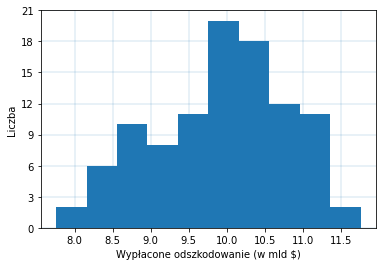

In [724]:
plt.hist(np.array(b[3])/1e6)
plt.xlabel("Wypłacone odszkodowanie (w mld $)")
plt.ylabel("Liczba")
plt.grid(color='C0', linestyle='-', linewidth=0.2)
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_xlim(left=0)
#ax.set_yticks(np.linspace(1,11,num=11))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\bootstrap_hist.pdf")
plt.show()

In [618]:
stats.bootstrap((loss_train['Damages'],),np.mean,confidence_level=0.95)

BootstrapResult(confidence_interval=ConfidenceInterval(low=8091255.947095301, high=11550465.057648512), standard_error=884141.2447429087)

In [698]:
bootstrap = pd.DataFrame({"n":pd.Series(test.groupby('Year').count()['Dis No']), "Mean":b[0], "LB": b[2][0], "UB": b[2][1]})
cum_bootstrap = bootstrap.cumsum()

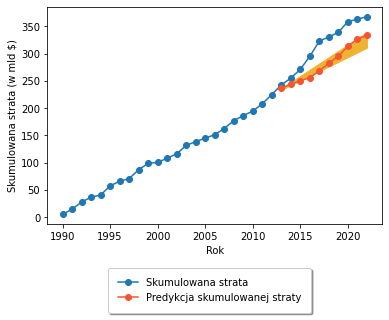

In [725]:
#Sinusoidalna funkcja intensywności
plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_exp["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.fill_between(cum_loss_sin_exp.index,(cum_bootstrap["LB"]+cum_loss_full["Damages"][2012])/1e6,(cum_bootstrap["UB"]+cum_loss_full["Damages"][2012])/1e6,color="#efb332")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_exp_sin_bootstrap.pdf",bbox_inches='tight')
plt.show()

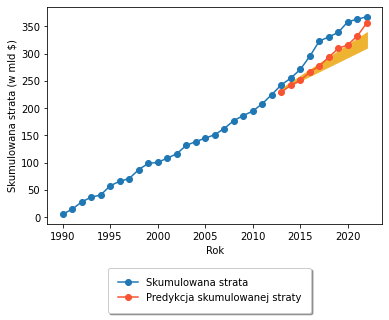

In [726]:
#Sinusoidalna funkcja intensywności
plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_ln["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.fill_between(cum_loss_sin_ln.index,(cum_bootstrap["LB"]+cum_loss_full["Damages"][2012])/1e6,(cum_bootstrap["UB"]+cum_loss_full["Damages"][2012])/1e6,color="#efb332")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_ln_sin_bootstrap.pdf",bbox_inches='tight')
plt.show()

### Bootknife

In [728]:
def bootknife(data,S ,alpha, B = 100):
    """
    Argumenty:
        data: pd.Series
            Ciąg start
        B: float
            Liczba próbek bootstrapowych
        S: fun
            Statystka
        alpha: float
            Poziom istotności
    Zwraca:
        
            
    """
    X= []
    for i in range(B):
        obs_to_delete = random.choice(pd.Series(data).index)
        data_r = data.drop(obs_to_delete)
        X.append(S(pd.Series(data_r).sample(len(data),replace=True)))
    std = np.sqrt(np.sum(np.square(X-np.mean(X)))/(B-1))
    print("S: ",round(S(X),2),"std(S): ", round(std,2), "CI: ",[round(np.percentile(X,alpha/2),2),round(np.percentile(X,100-alpha/2),2)])
    return(S(X),std,[np.percentile(X,alpha/2),np.percentile(X,100-alpha/2)],X)

In [732]:
b2 = bootknife(loss_train['Damages'],np.mean,5,100)

S:  9867131.01 std(S):  973764.36 CI:  [8148087.64, 11847820.25]


In [734]:
bootknife = pd.DataFrame({"n":pd.Series(test.groupby('Year').count()['Dis No']), "Mean":b[0], "LB": b[2][0], "UB": b[2][1]})
cum_bootknife = bootknife.cumsum()

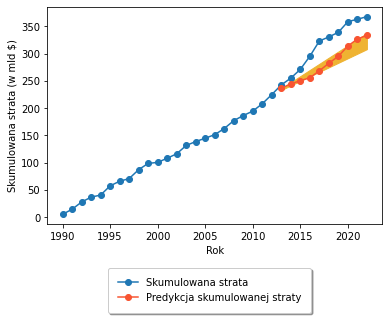

In [735]:
#Sinusoidalna funkcja intensywności
plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_exp["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.fill_between(cum_loss_sin_exp.index,(cum_bootknife["LB"]+cum_loss_full["Damages"][2012])/1e6,(cum_bootknife["UB"]+cum_loss_full["Damages"][2012])/1e6,color="#efb332")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_exp_sin_bootknife.pdf",bbox_inches='tight')
plt.show()

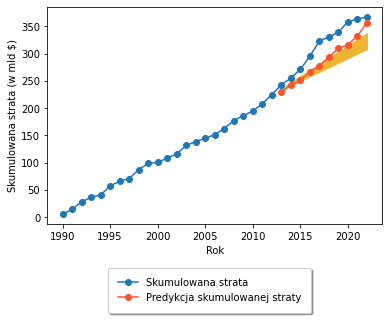

In [736]:
#Sinusoidalna funkcja intensywności
plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_ln["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.fill_between(cum_loss_sin_ln.index,(cum_bootknife["LB"]+cum_loss_full["Damages"][2012])/1e6,(cum_bootknife["UB"]+cum_loss_full["Damages"][2012])/1e6,color="#efb332")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_ln_sin_bootknife.pdf",bbox_inches='tight')
plt.show()